<a href="https://colab.research.google.com/github/medhanies/math-ml-foundations/blob/main/notebooks/4_calculus_ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculus 2: Partial Derivatives and Integrals

**Segment 2: Gradients Applied to Machine Learning**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math # for constant pi

Partial Derivatives of Multivariate Functions

Define a function $f(x, y)$ for $z = x^2 - y^2$:

In [2]:
def f(my_x, my_y):
  return my_x**2 - my_y**2

In [3]:
xs = np.linspace(-3, 3, 1000)

In [4]:
zs_wrt_x = f(xs, 0)

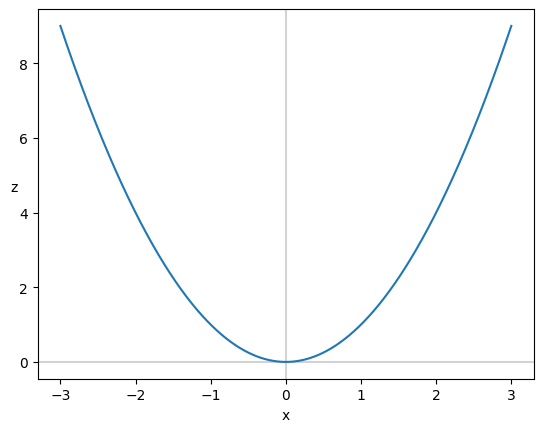

In [5]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

To determine the slope of $z$ w.r.t. $x$ at a given point along the curve, we can use the partial derivative from the slides: $$ \frac{\partial z}{\partial x} = 2x$$

In [10]:
def delz_delx(my_x, my_y): # y inst relevant for this partial derivative
  return 2*my_x

In [11]:
x_samples = [-2, -2, 0, 1, 2]

In [12]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [13]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):

  my_z = my_f(my_x, my_y) # z = f(x, y)
  plt.scatter(my_x, my_z, c=col, zorder=3)

  tangent_m = fprime(my_x, my_y) # Slope is partial derivative of f(x,y) w.r.t. x
  tangent_b = my_z - tangent_m*my_x # Line is z=mx+b, so b=z-mx
  tangent_line = tangent_m*my_xs + tangent_b

  plt.plot(my_xs, tangent_line, c=col,
           linestyle='dashed', linewidth=0.7, zorder=3)

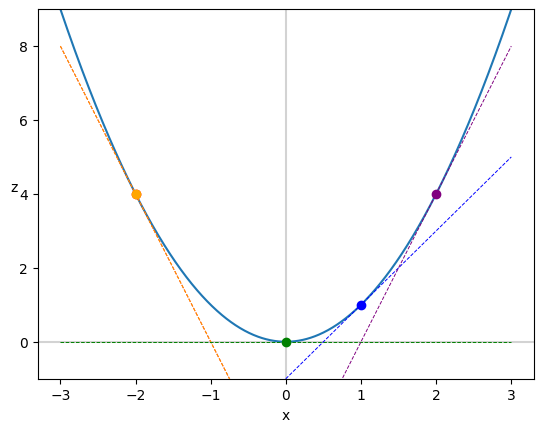

In [14]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
  point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

In [15]:
ys = np.linspace(-3, 3, 1000)

In [16]:
zs_wrt_y = f(0, ys)

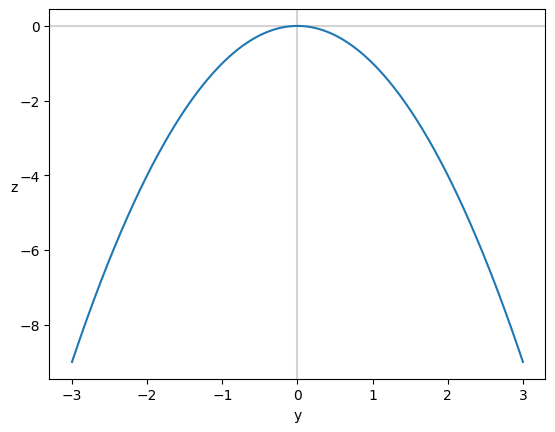

In [17]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

As in the slides, the partial derivative of $z$ w.r.t $y$ happens to be independent of $x$ (just as we observed $x$ is independent of $y$ above), so while $z$ varies as a function of both $x$ and $y$, the slope of $z$ w.r.t $y$ is the same no matter what $x$ is: $$ \frac{\partial z}{\partial y} = -2y $$

In [18]:
zs_wrt_y = f(2, ys)

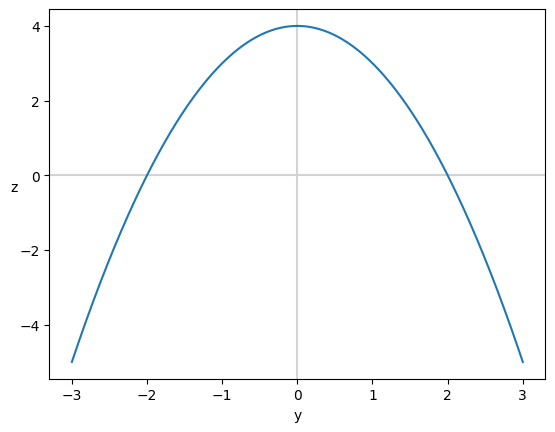

In [19]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

In [20]:
def delz_dely(my_x, my_y):
  return -2*my_y

In [21]:
y_samples = [-2, -1, 0, 1, 2]

In [26]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # changed my_xs to my_ys

  my_z = my_f(my_x, my_y)
  plt.scatter(my_y, my_z, c=col, zorder=3) # changed my_x to my_y

  tangent_m = fprime(my_x, my_y)
  tangent_b = my_z - tangent_m*my_y # changed my_x to my_y
  tangent_line = tangent_m*my_ys + tangent_b # changed my_xs to my_ys

  plt.plot(my_ys, tangent_line, c=col, linestyle='dashed', linewidth=0.7, zorder=3) # changed my_xs to my_ys

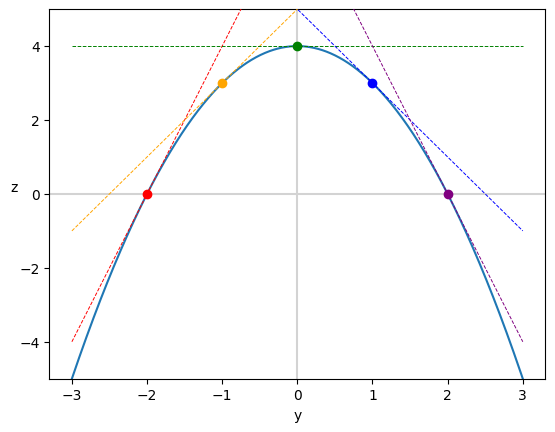

In [27]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
  point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim(-5, 5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

Autodiff to calc. slope of z w.r.t. x and y

In [40]:
x = torch.tensor(-2.).requires_grad_()
x

tensor(-2., requires_grad=True)

In [41]:
y = torch.tensor(-3.).requires_grad_()
y

tensor(-3., requires_grad=True)

In [42]:
z = f(x, y) # forward pass

In [43]:
z.backward() # autodiff

In [44]:
x.grad

tensor(-4.)

In [45]:
y.grad

tensor(6.)

In [90]:
import tensorflow as tf

x = tf.Variable(-5.0)

In [91]:
y = tf.Variable(-7.0)

In [95]:
with tf.GradientTape(persistent=True) as t:
  t.watch(x)
  t.watch(y)
  z = x**2 - y**2

In [96]:
t.gradient(z,y)

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [97]:
t.gradient(z,x)

<tf.Tensor: shape=(), dtype=float32, numpy=-10.0>

**Partial Derivatives of a Cylinder's Volume**

In [98]:
def cylinder_vol(my_r, my_l):
  return math.pi * my_r**2 * my_l

In [99]:
r = torch.tensor(3.).requires_grad_()

In [100]:
l = torch.tensor(5.).requires_grad_()